In [1]:
%%cmd
kaggle datasets download -d mdabbert/ultimate-ufc-dataset
mkdir data
mv ultimate-ufc-dataset.zip data/
cd data/
unzip ultimate-ufc-dataset.zip
cd ..
;

Microsoft Windows [Version 10.0.19041.746]
(c) 2020 Microsoft Corporation. All rights reserved.

C:\Users\jpzam\Projects\ufc>kaggle datasets download -d mdabbert/ultimate-ufc-dataset


C:\Users\jpzam\Projects\ufc>mkdir data

C:\Users\jpzam\Projects\ufc>mv ultimate-ufc-dataset.zip data/

C:\Users\jpzam\Projects\ufc>cd data/

C:\Users\jpzam\Projects\ufc\data>unzip ultimate-ufc-dataset.zip
Archive:  ultimate-ufc-dataset.zip

C:\Users\jpzam\Projects\ufc\data>

100%|##########| 556k/556k [00:00<00:00, 6.47MB/s]
A subdirectory or file data already exists.
replace most-recent-event.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [cd ..]
replace most-recent-event.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [;]
replace most-recent-event.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


# UFC Fights

## Project Planning

- understand data
- formulate more questions
- general EDA
    - seperate num and cat cols
- feature engineering
- model brainstorming
- model testing

### Notes From Reading Other Notebooks

- label encoded categorical columns
- use `df.hist()` to view univariate plots

## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

In [3]:
ufc = pd.read_csv('data/ufc-master.csv')

In [4]:
ufc.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'R_td_attempted_bout', 'B_td_attempted_bout', 'R_td_pct_bout',
       'B_td_pct_bout', 'R_sub_attempts_bout', 'B_sub_attempts_bout',
       'R_pass_bout', 'B_pass_bout', 'R_rev_bout', 'B_rev_bout'],
      dtype='object', length=137)

- Target variable is `Winner`

In [5]:
pd.set_option('display.max_columns', 500)
ufc.describe()

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
count,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,3604.000000,3769.000000,3702.000000,3701.000000,3692.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4079.000000,4177.000000,4177.000000,4177.000000,4167.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.0,796.000000,1215.000000,45.000000,6.0,95.000000,109.000000,131.000000,131.000000,120.000000,130.000000,126.000000,125.000000,125.000000,132.000000,148.000000,32.00000,0.0,54.000000,74.000000,100.000000,86.000000,90.000000,81.000000,81.000000,84.000000,78.000000,89.000000,28.000000,4099.000000,4099.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,-119.357962,68.059550,95.027596,168.967553,3.180194,0.473533,0.859506,0.008161,28.551546,0.443198,0.499015,1.225719,0.308944,1.729599,1.699603,10.507499,0.235333,0.013454,0.254521,0.948390,0.946405,0.581165,0.031981,2.822673,178.180785,182.492940,165.065946,0.601676,1.042567,0.007278,29.456055,0.453784,0.518950,1.323417,0.325062,2.492060,2.335906,15.604102,0.567270,0.026246,0.361932,1.437583,1.409352,0.852669,0.051169,4.197839,

- looks like red tends to be favored
- `no_of_rounds` describes the **set** number of rounds
- red's mean win streak tends to be higher than blue
- both red and blue have a max of 1.0 for significant strike pct and take-down pct
- should probably visualize red vs blue metrics
- red's mean total rounds fought tends to be higher than blue's
- red and blue's mean age is nearly the same
- differentials are calculated as blue - red
- red's mean weight-class ranks tends to be lower (better) than blue's
- the mean fight ends before 3 rounds, indicated by `finish_round`
- 5 seconds is the shortest fight... Masvedal?
- not sure what the columns suffixed by *bout* are about, documentation says this is for daily fantasy

In [6]:
ufc.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Max Holloway,Calvin Kattar,-162,138,61.728395,138.000000,1/16/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,False,Featherweight,MALE,5,0,2,0,5.01,0.41,0.0,0.47,0.37,2,2,21,0,0,0,2,4,0,0,6,Orthodox,180.34,182.88,145,2,0,0,6.47,0.44,0.4,0.22,0.83,13,6,70,8,0,1,5,9,2,0,17,Orthodox,180.34,175.26,145,29,32,-2,2,-11,-11,-4,-49,-8,-5,-2,0.00,7.62,3,-1.46,-0.4,0.25,1,1,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carlos Condit,Matt Brown,-177,145,56.497175,145.000000,1/16/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,False,Welterweight,MALE,3,1,0,0,3.81,0.54,1.5,1.60,0.47,7,11,58,0,0,0,2,11,2,0,15,Orthodox,182.88,190.50,170,0,1,0,3.69,0.39,1.1,0.55,0.55,5,10,60,3,0,1,2,6,4,0,13,Orthodox,187.96,190.50,170,36,40,1,-1,2,2,1,-2,-3,5,-2,-5.08,0.00,4,0.12,0.4,1.05,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Santiago Ponzinibbio,Li Jingliang,-305,240,32.786885,240.000000,1/16/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,False,Welterweight,MALE,3,1,0,0,4.51,0.42,0.0,1.32,0.39,4,4,32,0,0,1,2,6,0,0,9,Orthodox,182.88,180.34,170,0,7,0,4.27,0.39,0.0,0.54,0.44,7,2,25,0,0,0,4,5,0,0,9,Orthodox,182.88,185.42,170,34,32,1,-7,-3,0,2,7,0,1,0,0.00,-5.08,-2,0.24,0.0,0.78,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
ufc.tail()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
4529,Duane Ludwig,Darren Elkins,-155,135,64.516129,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,177.80,180.34,145,1,0,0,13.666667,0.576667,0.000000,0.000000,0.000,2,1,5,0,0,0,1,1,0,0,2,Orthodox,177.80,177.80,170,31,25,1,0,-2,-2,1,-5,0,-1,0,0.00,2.54,6,-13.666667,0.000000,0.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,NaN,1.0,0:44,44.0,0.0,0.0,1.0,0.0,5.0,2.0,0.20,0.00,1.0,0.0,5.0,2.0,0.0,1.0,0.0,2.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4530,John Howard,Daniel Roberts,-210,175,47.619048,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Southpaw,177.80,187.96,170,0,3,0,18.000000,0.550000,1.000000,4.666667,0.790,3,0,9,0,0,2,0,1,0,0,3,Orthodox,170.18,180.34,170,27,29,0,-3,-3,-3,0,-9,0,-1,0,7.62,7.62,-2,-18.000000,-1.000000,-4.666667,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Punch,1.0,2:01,121.0,0.0,0.0,6.0,7.0,8.0,17.0,0.75,0.41,8.0,21.0,11.0,33.0,1.0,1.0,1.0,1.0,1.00,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4531,Brendan Schaub,Chase Gormley,-260,220,38.461538,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,3,1,0,0,8.000000,0.34,1.000000,1.000000,1.0,0,1,1,0,0,0,0,0,0,0,0,Orthodox,190.50,196.00,265,1,0,0,12.000000,0.250000,0.000000,0.000000,0.000,0,1,1,1,0,0,0,0,0,0,0,Orthodox,193.04,198.12,245,27,27,0,0,0,0,0,0,-1,0,0,-2.54,-2.12,0,-4.000000,1.000000,1.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- looks like the *bout* columns is the actual number of attack types for that particular fight, rather than overall avg

In [8]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Columns: 137 entries, R_fighter to B_rev_bout
dtypes: bool(1), float64(75), int64(47), object(14)
memory usage: 4.7+ MB


In [9]:
ufc.shape

(4534, 137)

In [10]:
numeric_features = ufc.select_dtypes(include=[np.number])

numeric_features.columns

Index(['R_odds', 'B_odds', 'R_ev', 'B_ev', 'no_of_rounds',
       'B_current_lose_streak', 'B_current_win_streak', 'B_draw',
       'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct',
       ...
       'R_td_attempted_bout', 'B_td_attempted_bout', 'R_td_pct_bout',
       'B_td_pct_bout', 'R_sub_attempts_bout', 'B_sub_attempts_bout',
       'R_pass_bout', 'B_pass_bout', 'R_rev_bout', 'B_rev_bout'],
      dtype='object', length=122)

In [11]:
categorical_features = ufc.select_dtypes(include=[np.object])

categorical_features.columns

Index(['R_fighter', 'B_fighter', 'date', 'location', 'country', 'Winner',
       'weight_class', 'gender', 'B_Stance', 'R_Stance', 'better_rank',
       'finish', 'finish_details', 'finish_round_time'],
      dtype='object')

- it's possible that we may get more categorical features since some of the numerical features are categorical in nature

In [12]:
boolean_features = ufc.select_dtypes(include=[np.bool])

boolean_features.columns

Index(['title_bout'], dtype='object')

- can change this to categorical

In [13]:
# checking avg for one fighter
ufc.query("R_fighter == 'Brendan Schaub'")['R_avg_SIG_STR_landed']

3431    22.250000
3646    22.857143
3935    25.166667
4370    15.666667
4443    18.500000
4531    12.000000
Name: R_avg_SIG_STR_landed, dtype: float64

- averages change from fight to fight

In [14]:
import missingno as msno

<AxesSubplot:>

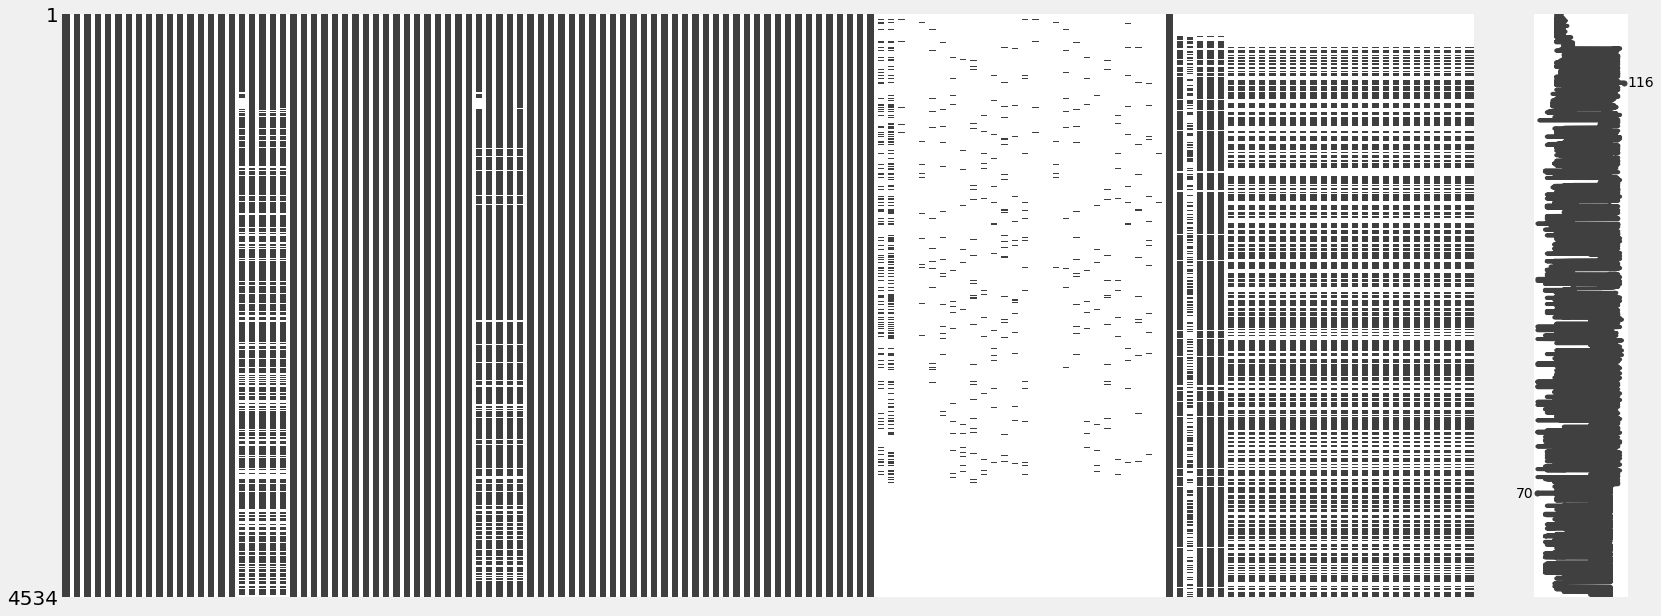

In [15]:
msno.matrix(ufc)

- there's a lot of missing values, these appear to be the ranking columns

<AxesSubplot:>

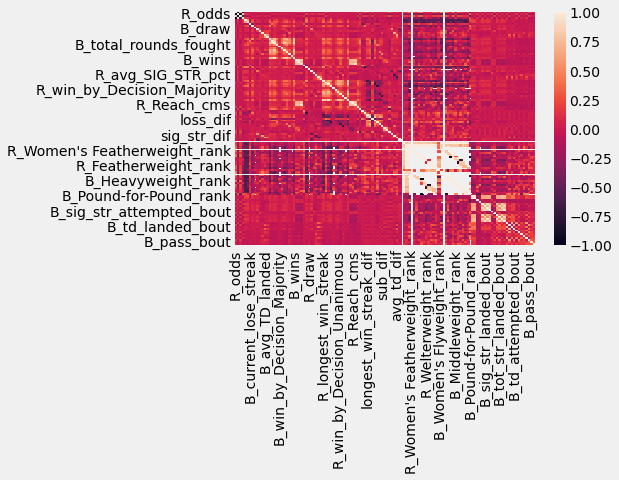

In [16]:
correlations = ufc.corr()
# visualize correlations
sns.heatmap(correlations)

array([[<AxesSubplot:title={'center':'R_odds'}>,
        <AxesSubplot:title={'center':'B_odds'}>,
        <AxesSubplot:title={'center':'R_ev'}>,
        <AxesSubplot:title={'center':'B_ev'}>,
        <AxesSubplot:title={'center':'no_of_rounds'}>,
        <AxesSubplot:title={'center':'B_current_lose_streak'}>,
        <AxesSubplot:title={'center':'B_current_win_streak'}>,
        <AxesSubplot:title={'center':'B_draw'}>,
        <AxesSubplot:title={'center':'B_avg_SIG_STR_landed'}>,
        <AxesSubplot:title={'center':'B_avg_SIG_STR_pct'}>,
        <AxesSubplot:title={'center':'B_avg_SUB_ATT'}>],
       [<AxesSubplot:title={'center':'B_avg_TD_landed'}>,
        <AxesSubplot:title={'center':'B_avg_TD_pct'}>,
        <AxesSubplot:title={'center':'B_longest_win_streak'}>,
        <AxesSubplot:title={'center':'B_losses'}>,
        <AxesSubplot:title={'center':'B_total_rounds_fought'}>,
        <AxesSubplot:title={'center':'B_total_title_bouts'}>,
        <AxesSubplot:title={'center':'B_win_

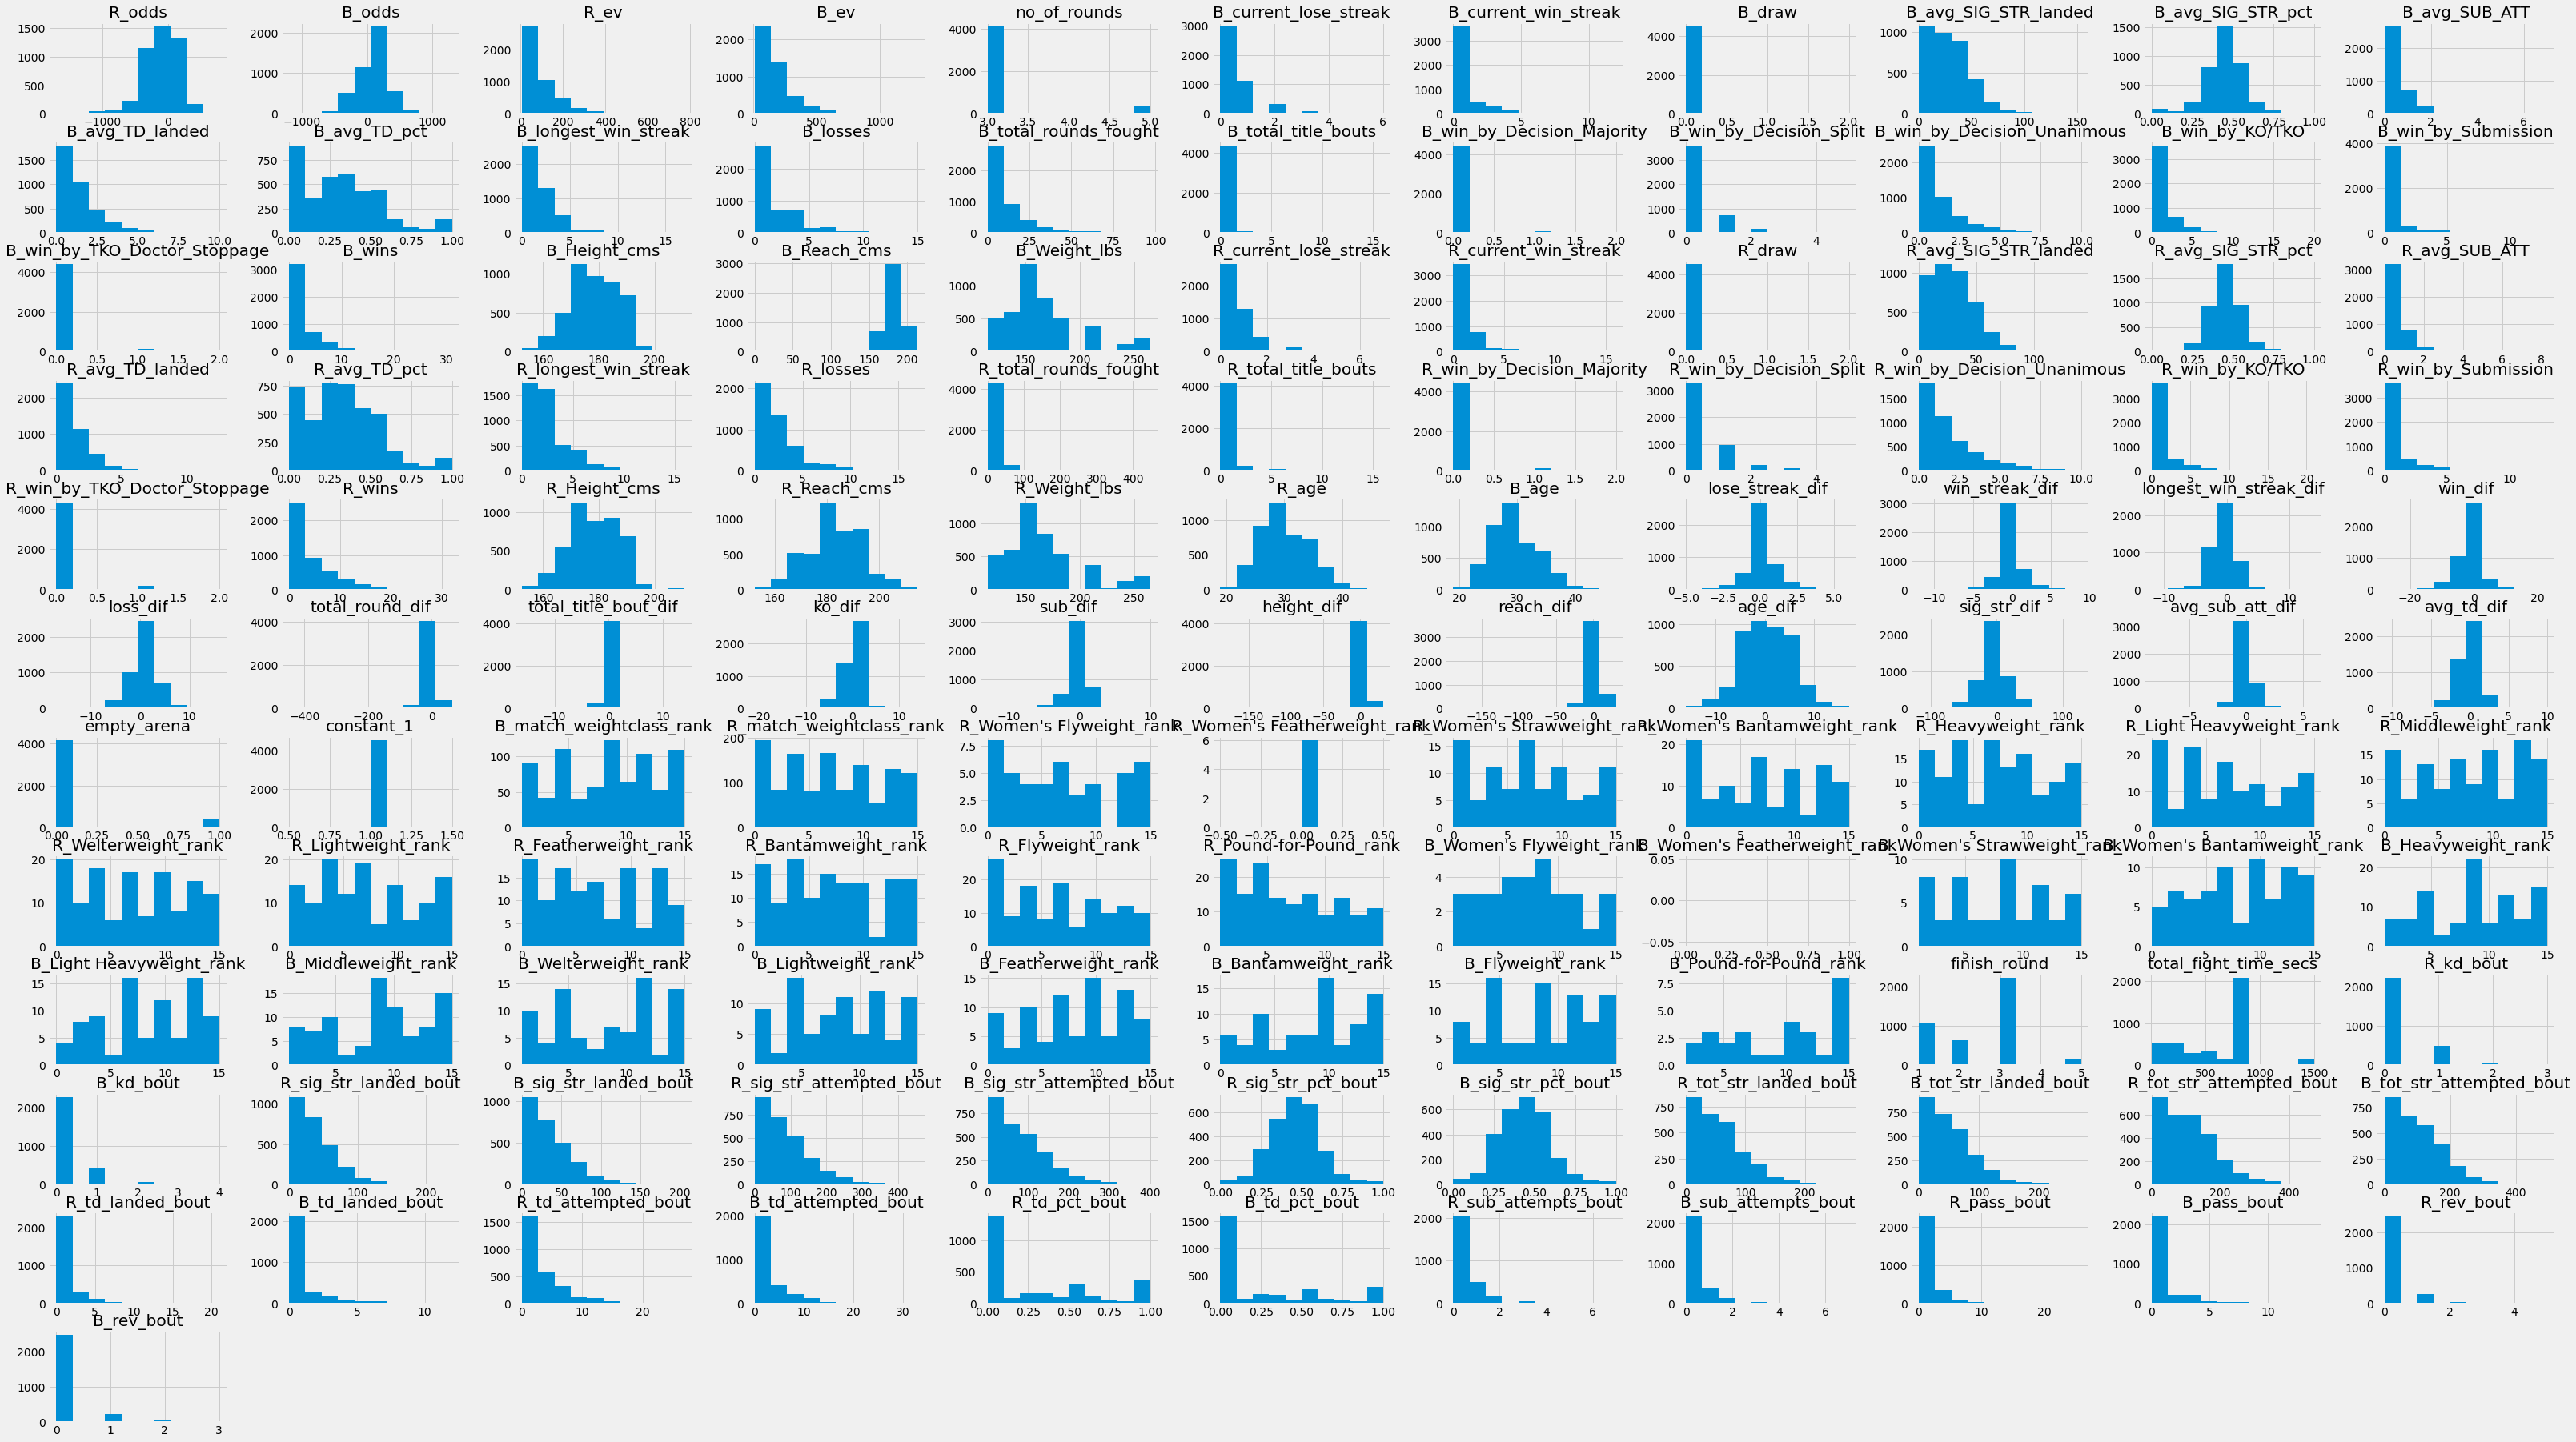

In [17]:
numeric_features.hist(figsize=(50,30))

- normalish dists
    - `B_avg_SIG_STR_pct` and `R_avg_SIG_STR_pct`
    - `R_odds` and `B_odds`
    - `R_Height_cms` and `B_Height_cms`
    - `R_Reach_cms` and `B_Reach_c
    - `R_age` and `B_age`
    - `R_avg_TD_pct` and `B_avg_TD_pct`
        - may have to do some transformation or something else creative here

In [18]:
# possible variables to explore for simple models
init_num_cols = ['B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct', 'R_odds', 'B_odds', 'R_Height_cms', 'B_Height_cms',
                'R_Reach_cms', 'B_Reach_cms', 'R_age', 'B_age', 'R_avg_TD_pct', 'B_avg_TD_pct']

In [19]:
categorical_features.columns

Index(['R_fighter', 'B_fighter', 'date', 'location', 'country', 'Winner',
       'weight_class', 'gender', 'B_Stance', 'R_Stance', 'better_rank',
       'finish', 'finish_details', 'finish_round_time'],
      dtype='object')

In [20]:
# saving names for later
red_names = categorical_features.R_fighter
blue_names = categorical_features.B_fighter

C:\Users\jpzam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

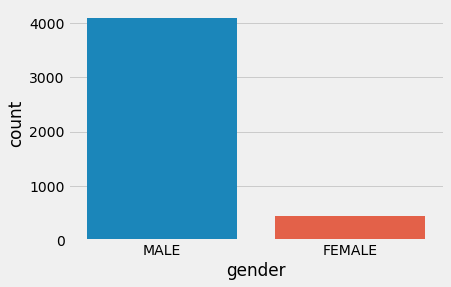

In [21]:
sns.countplot(categorical_features.gender)